In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [37]:
%config InlineBackend.figure_format = 'svg'


# Introduction to Python Classes 

## Beginner 

A class in python is a blueprint for creating objects. It's a very powerful concept that allows us to create our own objects that have methods and attributes, and these methods and attributes are specific to the object we created. 

Let's define a class called `Particle` and build from there. 

In [2]:
class Particle():
    def __init__(self, x, y, z, vx, vy, vz, m):
        self.x = x 
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz 
        self.m = m 
    def move(self, t):
        self.x += self.vx * t
        self.y += self.vy * t 
        self.z += self.vz * t
    def get_distance_from_origin(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)

Now let's create an **instance** of the `Particle` class.

In [15]:
p1 = Particle(0, 0, 1, 1, 0, 0, 3)

We can access the attributes of the class instance using the dot notation.

In [16]:
p1.m

3

We can call on the methods of the class instance using the dot notation as well and modify the attributes of the class instance.

In [17]:
p1.move(2)
p1.x

2

This method specifically does some operation on the attributes of the class instance but does not return anything.

We can also create and access methods that return some value, like the `get_distance_from_origin` method.

In [18]:
p1.get_distance_from_origin()

2.23606797749979

### Inheritance of Classes 

Class inheritance is an extremely powerful concept in object oriented programming. It allows us to define a class that inherits all the methods and attributes of another class. This can come in very handy, not only when we want to create a new class that is similar to an existing class, but also when we want to create a new class that is a more specialized version of an existing class. 

This concept is also very useful in python itself, because of the large number of powerful modules that are already available for us to import in all sorts of applications.

For this specific example, let's consider a **proton**.  

+ A proton is a particle, so it makes sense to inherit from the `Particle` class. 
+ It also has some unique traits, like a charge of $+1.602 \times 10^{-19}$ C and a mass of $1.672 \times 10^{-27} kg$. 

So we can exploit class inheritance if we think of a proton as a more specialized version of a general particle.

The way we generally describe this is that a **child** class inherits from a **parent** class.

In [21]:
class Proton(Particle):
    def __init__(self, x, y, z, vx, vy, vz):
        self.q = 1.602e-19 # coulomb
        self.m = 1.672e-27 # kg
        super(Proton, self).__init__(x, y, z, vx, vy, vz, self.m)

In [22]:
p = Proton(0, 0, 1, 1, 0, 0)

All of the methods and attributes of the parent class are automatically inherited by the child class.

In [23]:
p.x

0

In [24]:
p.vz

0

In [25]:
p.get_distance_from_origin()

1.0

And of course the child class can have its own unique methods and attributes.

In [27]:
p.m, p.q

(1.672e-27, 1.602e-19)

As said before, we can define additional attributes. But we can also redefine attributes that were defined in the parent class. 

For instance, being a charged particle, the proton would be influenced by an electric field, so we can redefine the `move` method to take into account the electric field.

In [28]:
class Proton(Particle):
    def __init__(self, x, y, z, vx, vy, vz):
        self.q = 1.602e-19 # coulomb
        self.m = 1.672e-27 # kg
        super(Proton, self).__init__(x, y, z, vx, vy, vz, self.m)
    def move(self, t, Ex, Ey, Ez):
        self.x += self.vx * t + (1/2)*(self.q/self.m)*Ex*t**2
        self.y += self.vy * t + (1/2)*(self.q/self.m)*Ey*t**2
        self.z += self.vz * t + (1/2)*(self.q/self.m)*Ez*t**2
        self.vx += (self.q/self.m)*Ex*t
        self.vy += (self.q/self.m)*Ey*t
        self.vz += (self.q/self.m)*Ez*t
    def get_position(self):
        return np.array([self.x, self.y, self.z])
    def get_velocity(self):
        return np.array([self.vx, self.vy, self.vz])

In [29]:
p = Proton(0, 0, 1, 1, 0, 0)

In [30]:
p.get_distance_from_origin(), p.get_position(), p.get_velocity()

(1.0, array([0, 0, 1]), array([1, 0, 0]))

Now move the proton

In [31]:
p.move(t = 2, Ex = 4e-12, Ey = 3e-12, Ez = 6e-12)

In [32]:
p.get_position()

array([2.00076651e+00, 5.74880383e-04, 1.00114976e+00])

## Intermediate

A class that contains all the information about a given projectile motion problem 

+ $\vec{r_0} = (x_0, y_0)$ is the initial position of the projectile. 
+ $\vec{v_0} = (v_{x_0}, v_{y_0})$ is the initial velocity of the projectile. 
+ $\Delta t$ is the time span of the motion. 

Other than these basic properties, we can define some additional properties of the motion in our class

+ `get_peak_y` returns the maximum height of the projectile during the motion. 
+ `get_peak_x` returns the horizontal distance corresponding to the maximum height of the projectile during the motion. 
+ `get_peak_t` returns the time corresponding to the maximum height of the projectile during the motion. 
+ `get_landing` returns the horizontal distance corresponding to the landing point of the projectile.

In [41]:
class Projectile(): 
    def __init__(self, r0, v0, g, t_span):
        self.t = t_span 
        x0, y0 = r0 
        vx0, vy0 = v0 
        self.x = x0 + vx0 * self.t 
        self.y = y0 + vy0 * self.t + -(1/2) * np.abs(g) * self.t**2
    def get_peak_y(self): 
        return np.max(self.y)
    def get_peak_x(self):
        return self.x[np.argmax(self.y)]
    def get_peak_t(self): 
        return self.t[np.argmax(self.y)]
    def get_x_landing(self): 
        x_after_peak = self.x[self.t > self.get_peak_t()]
        y_after_peak = self.y[self.t > self.get_peak_t()]
        return x_after_peak[np.argmin(np.abs(y_after_peak))]

Create a projectile and plot its trajectory

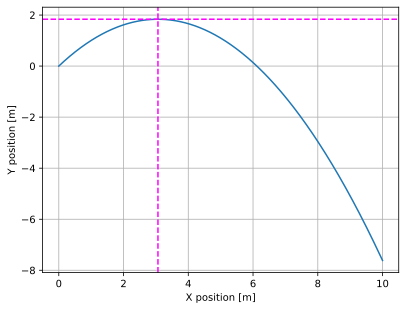

In [42]:
p = Projectile([0, 0], [5, 6], 9.808, np.linspace(0, 2, 1000))

#plt.figure(figsize=(5, 2))
plt.plot(p.x, p.y)
plt.axhline(p.get_peak_y(), color='magenta', ls='--')
plt.axvline(p.get_peak_x(), color='magenta', ls='--')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.grid()
plt.show()